<a href="https://colab.research.google.com/github/hima527/lithology_prediction/blob/main/lithology_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [2]:
df = pd.read_csv('log_data.csv')

In [3]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


In [5]:
df['LITH'].unique()

array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite'],
      dtype=object)

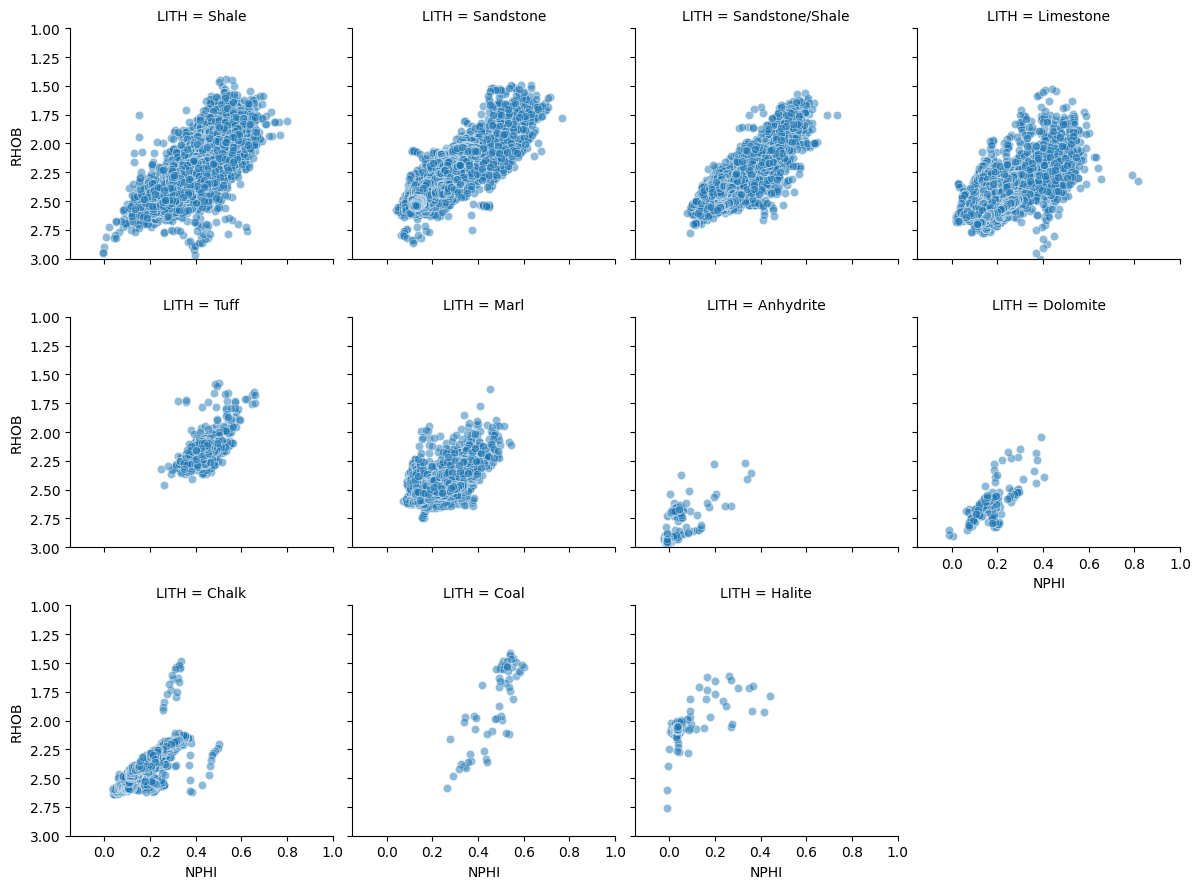

In [6]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

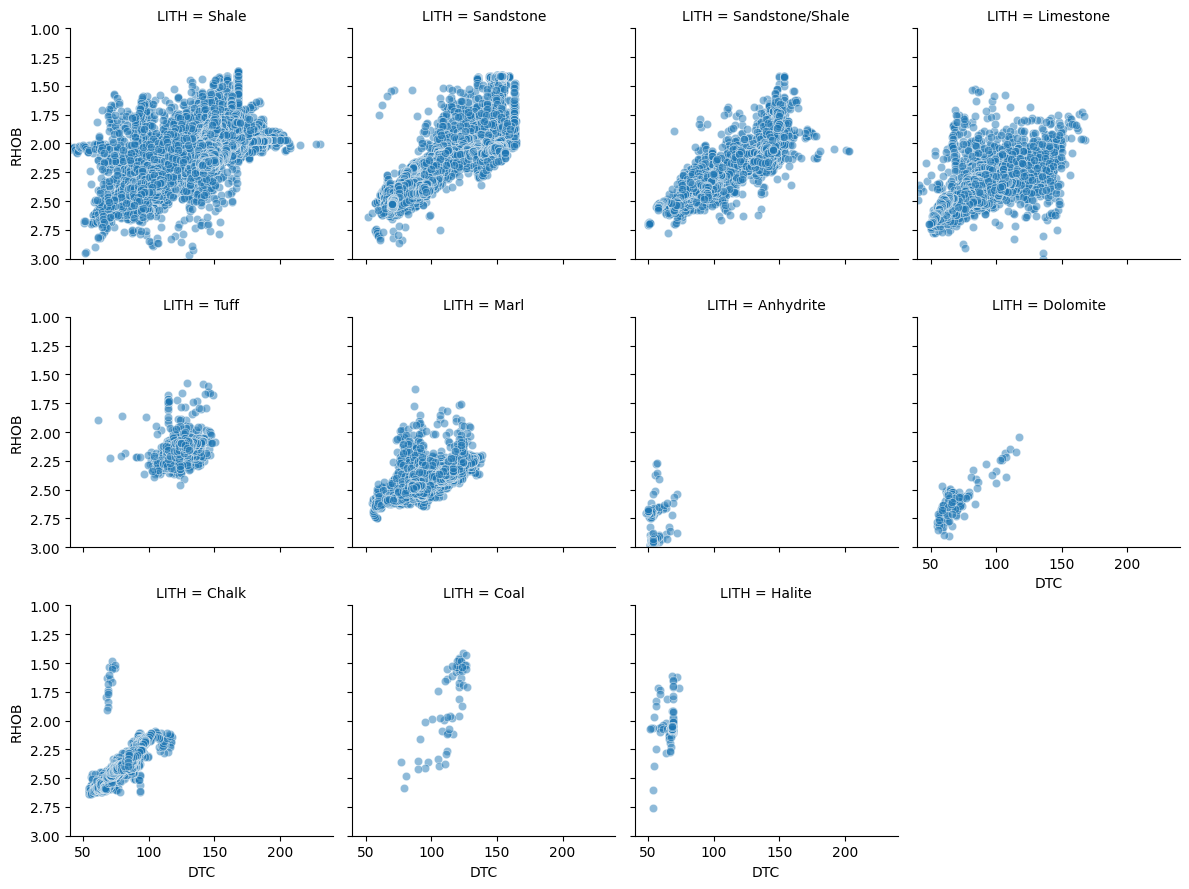

In [7]:
g = sns.FacetGrid(df, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'DTC', 'RHOB', alpha=0.5)
g.set(xlim=(40, 240))
g.set(ylim=(3, 1))

<Axes: >

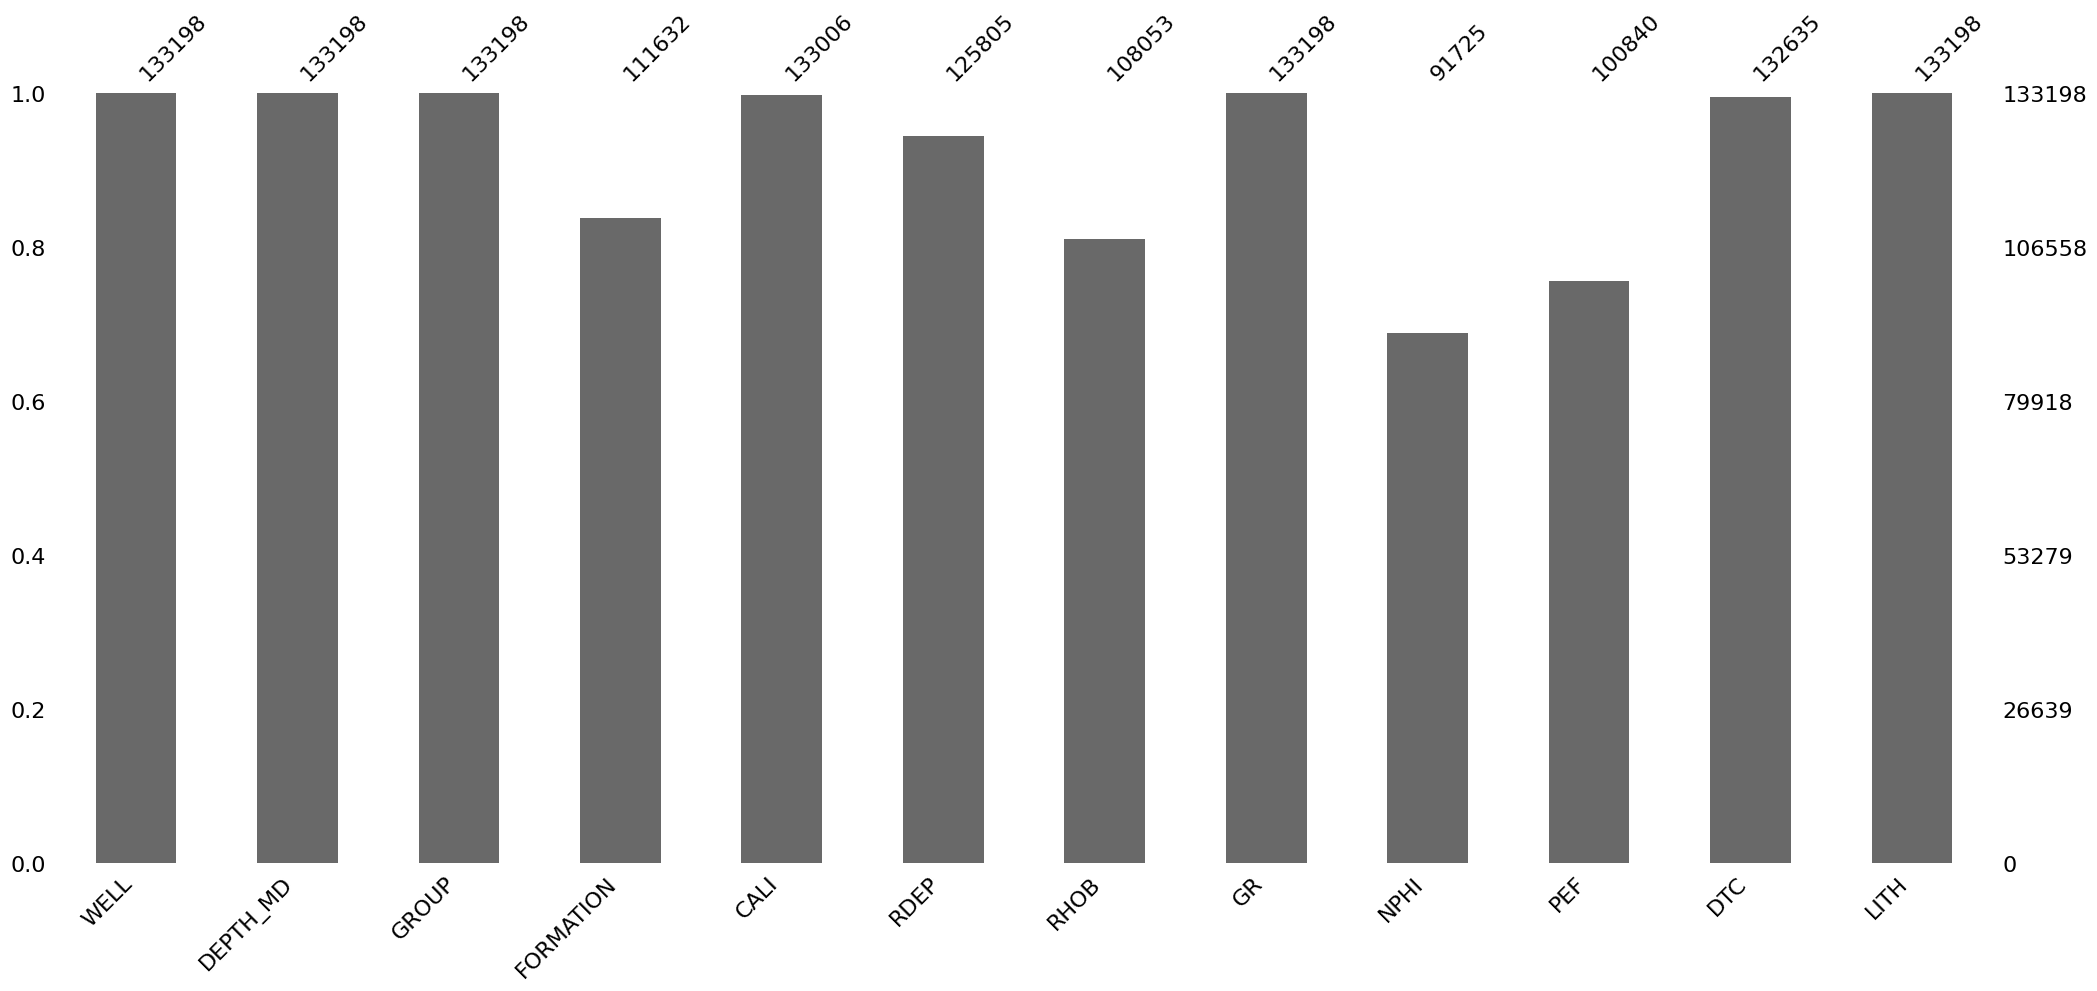

In [8]:
mno.bar(df)

In [9]:
df.dropna(inplace=True)

In [10]:
df['LITH'].value_counts()

,count
LITH,
Shale,48705
Limestone,10973
Sandstone,10076
Sandstone/Shale,4578
Marl,3715
Chalk,2254
Tuff,1034
Dolomite,98
Anhydrite,75


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [14]:
rf_1 = RandomForestClassifier()

In [17]:
rf_1.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rf_1.predict(X_test)


In [21]:
accuracy_score(y_test, y_pred)


0.9128125510704364

In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       0.93      1.00      0.96        13
          Chalk       0.84      0.72      0.78       659
           Coal       1.00      0.59      0.74        17
       Dolomite       0.88      0.50      0.64        28
         Halite       0.75      0.75      0.75         4
      Limestone       0.89      0.87      0.88      3279
           Marl       0.87      0.79      0.82      1103
      Sandstone       0.88      0.88      0.88      3026
Sandstone/Shale       0.78      0.63      0.70      1390
          Shale       0.94      0.98      0.96     14659
           Tuff       0.77      0.51      0.62       298

       accuracy                           0.91     24476
      macro avg       0.87      0.75      0.79     24476
   weighted avg       0.91      0.91      0.91     24476



In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[   13     0     0     0     0     0     0     0     0     0     0]
 [    0   477     0     0     0   167     2     6     7     0     0]
 [    0     0    10     0     0     0     1     1     0     5     0]
 [    0     0     0    14     0     0     1     7     6     0     0]
 [    0     0     0     0     3     0     0     0     0     1     0]
 [    1    79     0     1     0  2850    74    57    19   194     4]
 [    0     7     0     0     0   108   867    13    14    92     2]
 [    0     3     0     0     0    35    10  2672   112   187     7]
 [    0     1     0     1     0    19    16   187   879   285     2]
 [    0     0     0     0     1    24    28    75    96 14404    31]
 [    0     0     0     0     0     0     3    14     1   127   153]]


In [24]:
labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

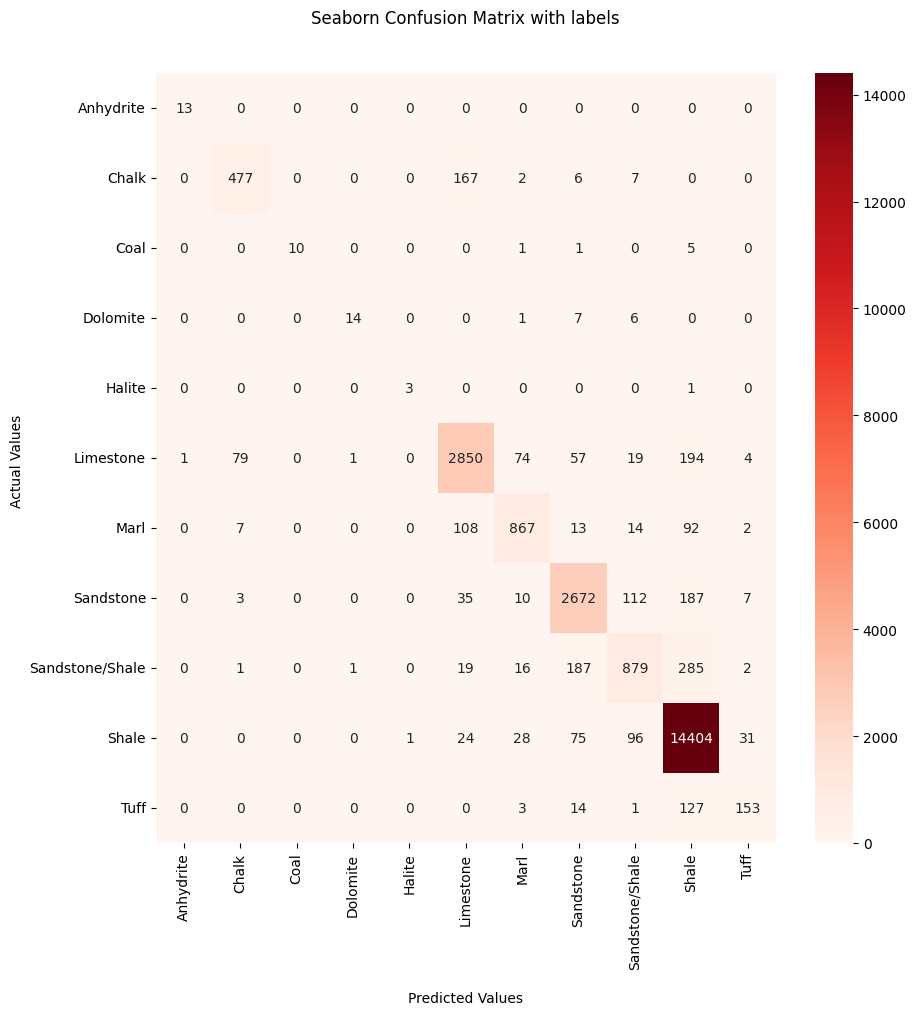

In [26]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels,
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

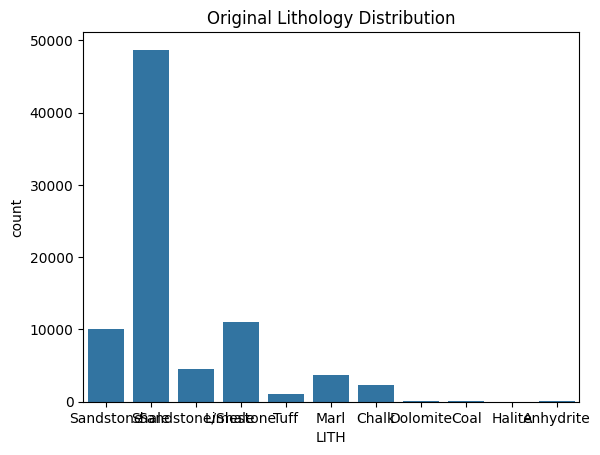

In [27]:
# Visualize class distribution before balancing
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Original Lithology Distribution")
plt.show()

In [28]:
# to handle class imbalance
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

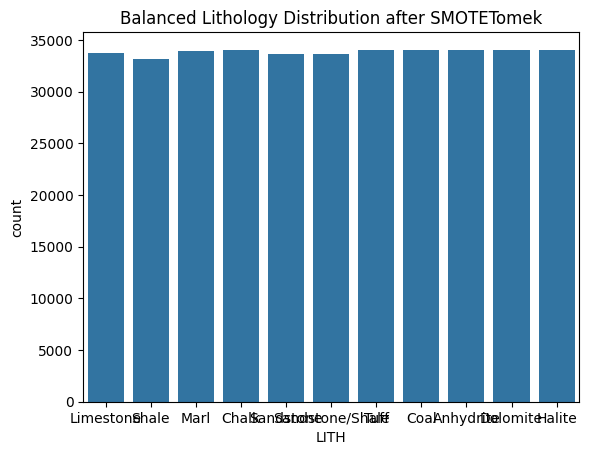

In [29]:
sns.countplot(x=y_resampled)
plt.title("Balanced Lithology Distribution after SMOTETomek")
plt.show()

In [31]:
rf_2 = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_2.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
y_sam_pred = rf_2.predict(X_test)
accuracy_score(y_test, y_sam_pred)

0.9016587677725119

In [33]:
#since after balancing the dataset we cant see much of a change in accuracy, lets move further with the original model.
import joblib
joblib.dump(rf_1, "rf_1_model.pkl")

['rf_1_model.pkl']

In [34]:
import joblib
joblib.dump(rf_2, "rf_2_model.pkl")

['rf_2_model.pkl']

In [47]:
# ======================
# FINAL PREDICTION SECTION IN COLAB
# ======================

from google.colab import files
import io
import pandas as pd
import joblib

# Upload a new file for prediction
uploaded = files.upload()

# Read uploaded file
for fn in uploaded.keys():
    test_df = pd.read_csv(io.BytesIO(uploaded[fn]))

# Show preview
print("Uploaded test data:")
display(test_df.head())

# --- Preprocessing same as training ---

# Drop nulls
test_df = test_df.dropna()

# Features to be used (same as model input)
feature_cols = ['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']
X_test = test_df[feature_cols]

model = joblib.load("rf_1_model.pkl")

# Predict
y_pred = model.predict(X_test)

# Add predictions to DataFrame
test_df['Predicted_Lithology'] = y_pred

# Show result
print("\nPrediction completed. Sample output:")
display(test_df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'Predicted_Lithology']].head())

# Optionally, download predictions
test_df.to_csv("lithology_predictions.csv", index=False)
files.download("lithology_predictions.csv")

Saving log_data.csv to log_data (3).csv
Uploaded test data:


,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-13,494.528,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15/9-13,494.680,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15/9-13,494.832,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15/9-13,494.984,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15/9-13,495.136,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale



Prediction completed. Sample output:


,RDEP,RHOB,GR,NPHI,PEF,DTC,Predicted_Lithology
4238,1.091499,1.774626,55.892757,0.765867,1.631495,147.837677,Shale
4239,1.122706,1.800986,60.929138,0.800262,1.645080,142.382431,Shale
4240,1.148141,1.817696,62.117264,0.765957,1.645873,138.258331,Shale
4241,1.170984,1.829333,61.010860,0.702521,1.620216,139.198914,Shale
4242,1.184080,1.813854,58.501236,0.639708,1.504854,144.290085,Shale


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>